# Aprendizaje automatico supervisado
# Problema de Clasificación de imagenes de ropa

![image.png](attachment:image.png)

### Desarrollar un clasificador de ropa a partir del Data set Mnist Fashion
##### Datos: 60, 000 mil imagenes de entrenamiento y 10,000 imagenes de prueba
##### Como es un entrenamiento supervisado ya esta eticado en 10 clases
##### Las imagenes ya se encuentran en escala de grises de 28x28 eso quiere decir que vamos a tener 784 neuronas de entrada

In [1]:
!pip install -U tensorboard
!pip install tensorflow
!pip install opencv-python

   ---------------------------------------- 0.0/5.5 MB ? eta -:--:--
   ------- -------------------------------- 1.0/5.5 MB 8.4 MB/s eta 0:00:01
   -------------------------- ------------- 3.7/5.5 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 5.5/5.5 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [3]:
#instalar la librerias
#!pip install tensorflow
import cv2
import matplotlib.pyplot as plt
#Cargar la imagen con openCV
imgBGR = cv2.imread('Modo.jpg')
#Cambiar esacio de color BGR a RGB
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
#Mostrar imagen
plt.xticks([]), plt.yticks([])
plt.imshow(imgRGB, cmap='gray', interpolation='bicubic')
plt.show()



error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
#importamos tf2 y keras
import tensorflow as tf
from tensorflow import keras #kit de herramientas para redes neuronales


#usaremos datatime para nombrar archivos
import datetime

import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

from PIL import Image
import requests
import urllib.request
from io import BytesIO

import cv2 #procesamiento de imagenes que será implementada para escalar


<ipython-input-14-0fd7a370ae2d>:12: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc


In [ ]:
print(cv2.__version__)

4.11.0


In [ ]:
#Importar Dataset
#Se usan 60,000 imagenes para entrenar la red y 10,000 para evaluar con que precision aprendio la red
#para clasificar las imagenes de ropa. Mnist directamente desde Tensorflow

![image.png](attachment:image.png)

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

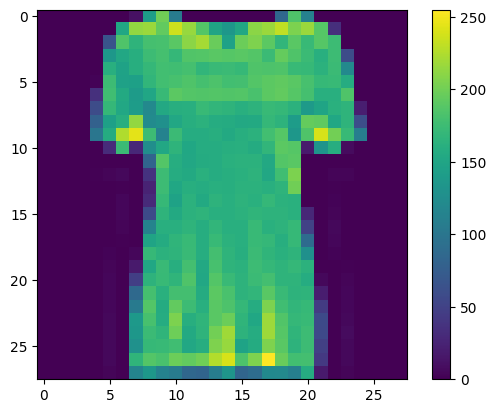

In [ ]:
#Mostrar una de las imagenes del dataset
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
#Las etiquetas son una matriz de enteros que van de 0 a 9. Estas corresponden a la clase de ropa de
#c/imagen

In [ ]:
#Vamos a crear una lista con los tipos de prendas que encontramos en el dataset

In [ ]:
class_names=['Camiseta','Pantalon','Sueter','Vestido','Abrigo','Sandalia', 'Camisa','tenis', 'bolso','botines']

# Explorando imagenes de entrenamiento

In [ ]:
train_images[10].shape

(28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
#Ver como lucen las etiquetas que son las "y" del entrenamiento supervisado

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_labels.shape

(10000,)

In [ ]:
#Ver como lucen los elementos del tensor, las 10 clases

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
#Ver como luce una imagen, minimo es 0 y el máximo es 255. La imagen es en el escala de grises
test_images[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145, 190,
         97, 109, 105, 187,  76,   0,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 170, 163, 208,
        243, 240, 229, 173, 162, 154,  18,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  39, 158, 196, 149, 191, 199,
        223, 243, 186, 191, 170, 155, 162, 126,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   0, 105, 161, 150, 141, 130, 199, 239,
        229, 220, 188, 244, 145, 128, 142, 151, 175,  23,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 150, 137, 134, 130, 147, 121, 241,
        255, 114, 240, 173, 142, 136, 132, 128, 153, 113,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  17, 157, 129, 146, 149, 137, 141, 177,
        200, 200, 207, 134, 145, 142, 140, 132, 129, 140,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  50, 158, 137, 153, 150, 125, 155, 191,
        175, 141, 165, 166, 153, 130, 129, 132, 141, 149,  18,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  77, 166, 161, 137, 151, 166, 181, 216,
        182, 158, 215, 195, 155, 159, 162, 173, 150, 150,  58,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 104, 159, 170, 140, 132, 182, 198, 208,
        175, 136, 174, 169, 147, 155, 121, 188, 162, 142, 101,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 112, 171, 206, 179, 147, 163, 177, 196,
        192, 146, 187, 153, 142, 144, 136, 245, 202, 132, 137,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 126, 181, 219, 146, 157, 128, 121, 175,
        196, 104, 157, 158, 151, 140, 103,  89, 221, 141, 153,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 157, 175, 216,  55, 175, 153, 151, 188,
        214, 126, 204, 159, 145, 145, 116,  71, 212, 154, 155,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 183, 163, 232,  64, 138, 142, 182, 195,
        200, 158, 231, 146, 130, 161, 132, 105, 225, 146, 157,  10,   0,
          0,   0],
       [  0,   0,   0,   0,   6, 188, 161, 221,  54, 149, 165, 151, 167,
        188, 170, 181, 154, 141, 130, 144,  93, 207, 166, 142,  34,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 182, 165, 236,  29, 146, 170, 141, 166,
        208, 124, 162, 173, 154, 132, 140,  97, 194, 153, 161,  47,   0,
          0,   0],
       [  0,   0,   0,   0,  58, 175, 171, 191,   5, 173, 162, 154, 181,
        207, 100, 161, 179, 155, 146, 149,  76, 192, 162, 150,  62,   0,
          0,   0],
       [  0,   0,   0,   0,  80, 179, 166, 167,  10, 182, 151, 157, 178,
        184, 166, 208, 174, 138, 146, 140,  73, 186, 161, 155,  71,   0,
          0,   0],
       [  0,   0,   0,   0, 100, 165, 171, 138,  51, 194, 157, 133, 187,
        196, 166, 198, 163, 129, 142, 134,  73, 191, 154, 155,  79,   0,
          0,   0],
       [  0,   0,   0,   0, 109, 158, 175, 118,  73, 179, 146, 149, 183,
        207, 141, 184, 171, 153, 137, 147,  73, 195, 157, 154,  85,   0,
          0,   0],
       [  0,   0,   0,   0, 109, 163, 179, 122, 116, 177, 144, 165, 182,
        190, 147, 179, 162, 146, 133, 153,  97, 161, 158, 150,  95,   0,
          0,   0],
       [  0,   0,   0,   0, 107, 158, 167, 163, 105, 137, 161, 163, 203,
        199, 149, 181, 167, 161, 147, 147,  99, 166, 157, 141,  99,   0,
          0,   0],
       [  0,   0,   0,   0, 109, 154, 166, 145,   0,  34,  84,  63, 107,
        149, 132, 153, 129, 124, 149,  56,   0, 114, 159, 141,  97,   0,
          0,   0],
       [  0,   0,   0,   0, 108, 154, 169,  85,   0,   0,   0,   0,   0,
          0,   2,   9,   0,   0,   0,   0,   0,  93, 157, 142,  99,   0,
          0,   0],
       [  0,   0,   0,   0, 101, 153, 169,  80,   0,   3,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   1,   0,  80, 155, 144, 105,   0,
          0,   0],
       [  0,   0,   0,   0, 121, 157, 16

# Reescalar las imagenes de 0-1
La reescala de imágenes de 0 a 255 a un rango de 0 a 1 es una práctica común en el procesamiento de imágenes. Esto se hace por varias razones:

Reducción de la complejidad: Al reescalar las imágenes a un rango de 0 a 1, se reduce la complejidad de los datos. En lugar de manejar valores enteros de 0 a 255, ahora se manejan valores de punto flotante entre 0 y 1. Esto hace que el procesamiento de las imágenes sea más eficiente y consume menos recursos.

Normalización de datos: Algunos algoritmos de aprendizaje automático, como las redes neuronales, se benefician de tener datos normalizados. Reescalar las imágenes de 0 a 255 a un rango de 0 a 1 es una forma de normalizar los datos de las imágenes.

Consistencia de datos: Al trabajar con varias imágenes, es importante tener una consistencia en los datos. Reescalar todas las imágenes a un rango de 0 a 1 asegura que todos los datos estén en el mismo rango.

<function matplotlib.pyplot.show(close=None, block=None)>

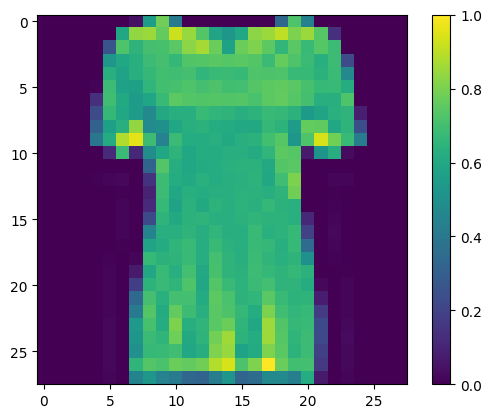

In [ ]:
train_images=train_images/255
test_images=test_images/255
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show

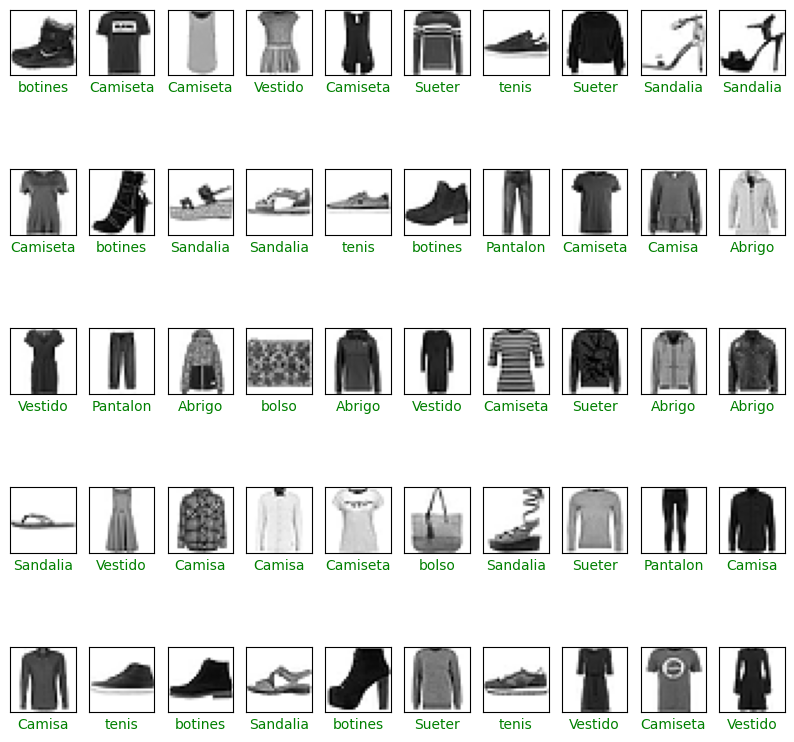

In [ ]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color='green')
plt.show()


# Funciones de activación

| **Función**    | **Fórmula**                                             | **Rango de salida**        | **Características**                                                                |
| -------------- | ------------------------------------------------------- | -------------------------- | ---------------------------------------------------------------------------------- |
| **Sigmoide**   | $\sigma(x) = \frac{1}{1 + e^{-x}}$                      | (0, 1)                     | Suave, útil para probabilidades. Problema: gradiente se desvanece.                 |
| **Tanh**       | $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$          | (-1, 1)                    | Cero centrado. Mejora sobre sigmoide, pero también sufre de gradientes pequeños.   |
| **ReLU**       | $f(x) = \max(0, x)$                                     | \[0, ∞)                    | Rápida y sencilla. Problema: neuronas muertas (no se activan).                     |
| **Leaky ReLU** | $f(x) = \max(\alpha x, x)$, típicamente $\alpha = 0.01$ | (-∞, ∞)                    | Soluciona el problema de neuronas muertas de ReLU.                                 |
| **ELU**        | $f(x) = x$ si $x > 0$, $\alpha(e^x - 1)$ si $x \leq 0$  | (-α, ∞)                    | Suave, evita neuronas muertas y mantiene salidas cercanas a cero.                  |
| **Softmax**    | $\sigma(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}$          | (0, 1), suma total = 1     | Convierte salidas en probabilidades, útil para clasificación multiclase.           |
| **Swish**      | $f(x) = x \cdot \sigma(x)$                              | (-0.28, ∞) aproximadamente | Suave, no monótona. Introducida por Google, puede mejorar rendimiento.             |
| **GELU**       | $f(x) = x \cdot \Phi(x)$                                | (-∞, ∞)                    | Activación usada en BERT y otros modelos modernos. Suave y con mejor convergencia. |


# Configurando la red neuronal

In [ ]:
modelo=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Capa de entrada plana
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 15)             │        11,775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,935 (46.62 KB)

 Trainable params: 11,935 (46.62 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#La capa de entranda no tiene pesos
#lA capa oculta tiene 11775 pesos para ajustar
#la ultima capa de salida adiciona 160 mas

| **Optimizador** | **Tipo**                      | **Fórmula clave / Mecanismo principal**                                   | **Características**                          |
| --------------- | ----------------------------- | ------------------------------------------------------------------------- | -------------------------------------------- |
| SGD             | Descenso estocástico          | $\theta = \theta - \eta \nabla J(\theta)$                                 | Simple, eficiente, sensible al learning rate |
| SGD + Momentum  | SGD + memoria                 | Usa una velocidad acumulada para suavizar el descenso                     | Mejora convergencia                          |
| Adagrad         | Adaptativo                    | Learning rate adaptado por parámetro                                      | Bueno para sparse data                       |
| RMSProp         | Adaptativo                    | Promedia cuadrado de gradientes para escalar learning rate                | Mantiene learning rate controlado            |
| Adam            | Adaptativo + momentum         | Combina momentum y RMSProp                                                | Muy popular, rápido                          |
| AdamW           | Adam + regularización L2      | Como Adam, pero con peso separado para decaimiento de peso (weight decay) | Mejor regularización                         |
| FTRL            | Follow-The-Regularized-Leader | Optimización con aceleración para grandes escalas                         | Muy usada en problemas con datos dispersos   |


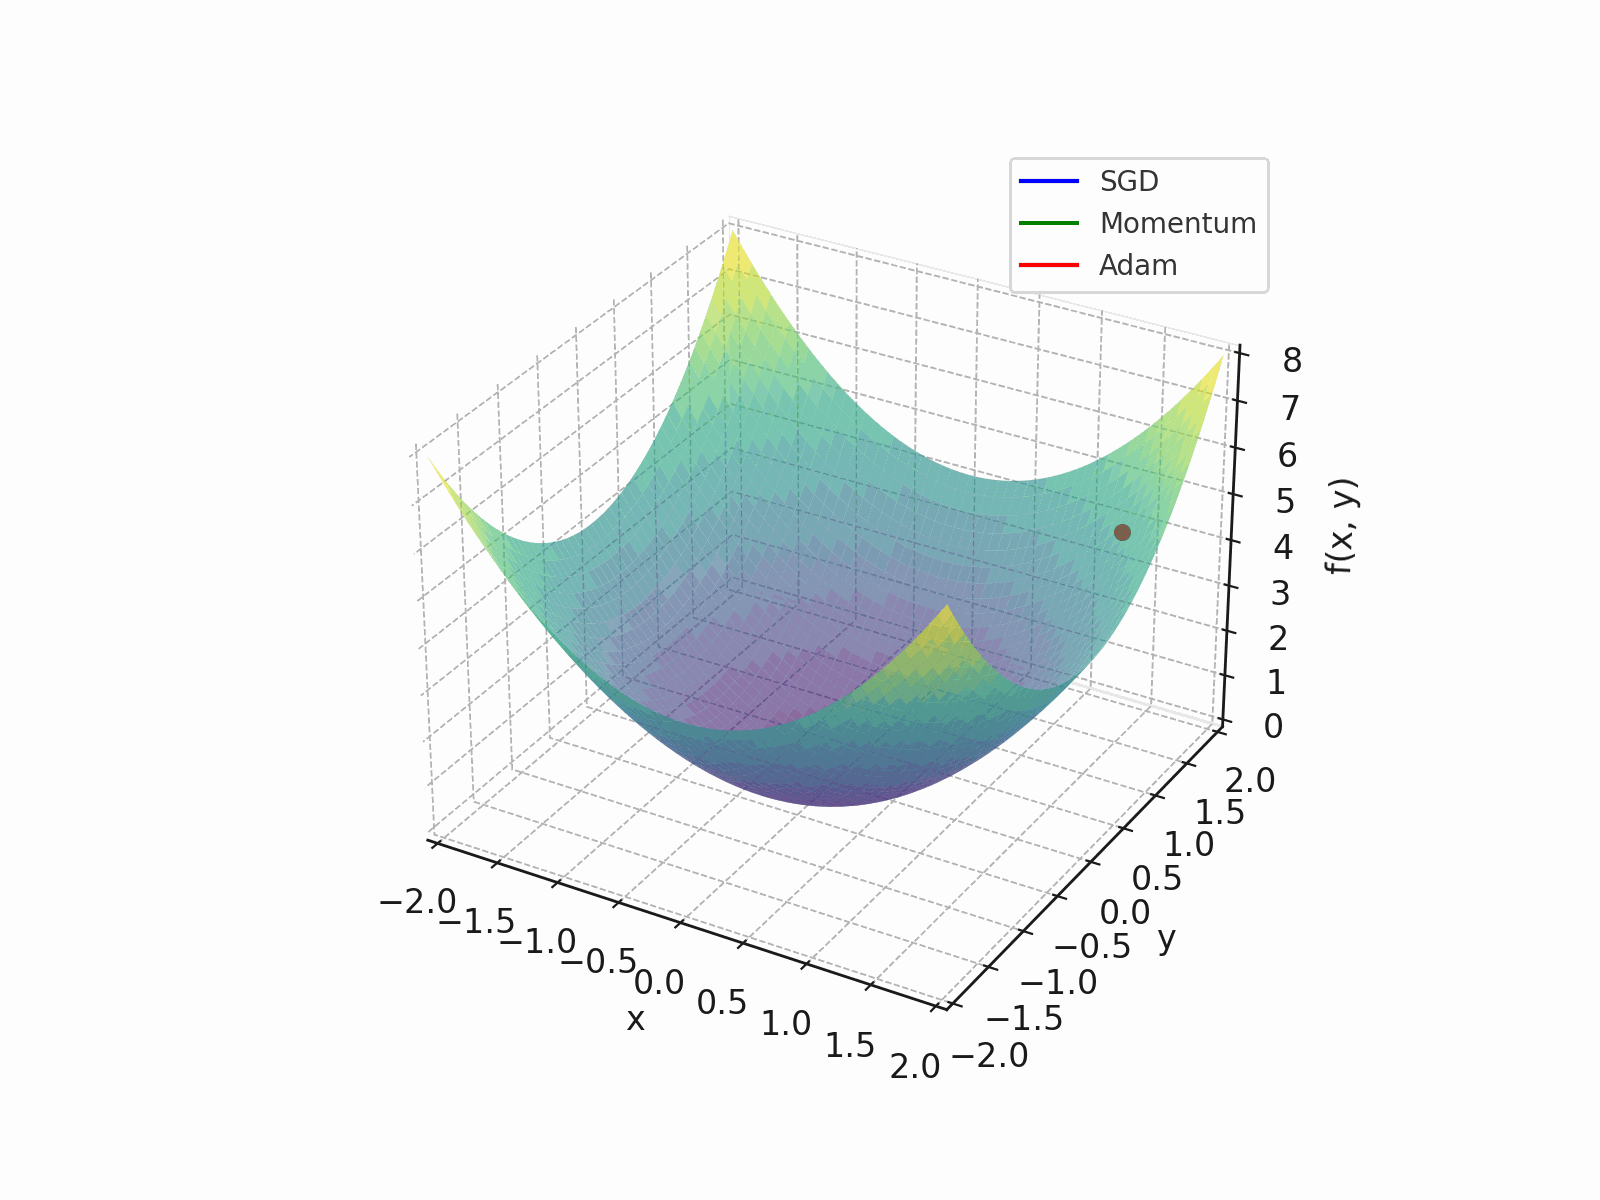

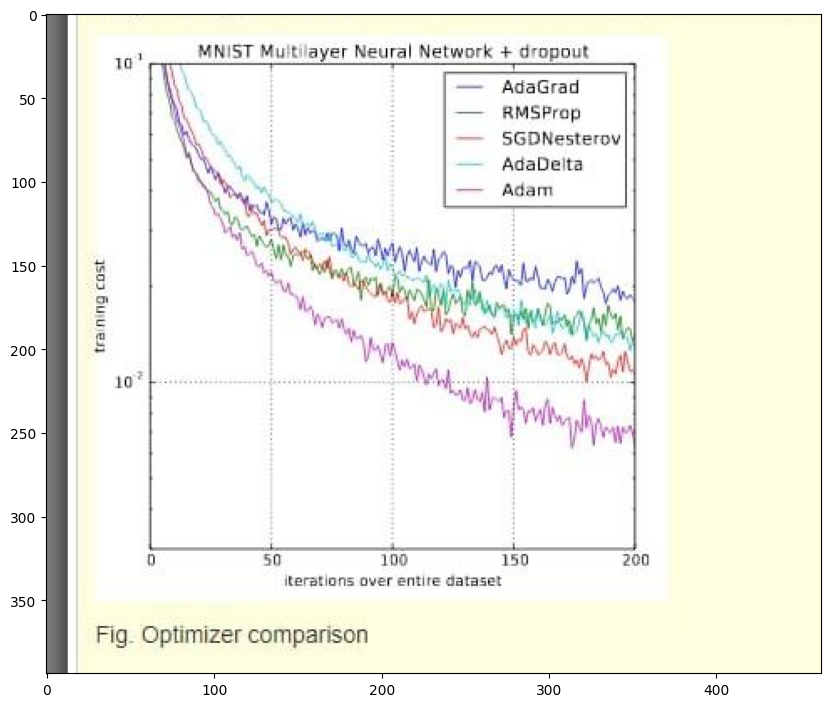

In [ ]:
#Ajustar los pesos del modelo para minimizar el costo
#Mejoras al Gradiente descendiente estocastico
url= 'https://media.cheggcdn.com/study/858/8582ee82-a232-4a94-bcfa-76682349104a/image'
Optimizadores=Image.open(urllib.request.urlopen(url))
imagen1=np.array(Optimizadores)
plt.figure(figsize=(10,10))
plt.imshow(imagen1)


In [ ]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 1 Se entrena el modelo
# 2 Se guardan los pesos para la prox eje


In [ ]:
#Le pasamos las imagenes de entrenamiento, las etiquetas y las epocas
#modelo.fit(train_images, train_labels, epochs=10)

checkpoint_path = "checkpoints.weights.h5"
cp_callbacks = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

modelo.fit(train_images,
           train_labels,
           epochs=10,
           batch_size=32,
           callbacks=[cp_callbacks])

Epoch 1/10
1853/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6833 - loss: 0.9105
Epoch 1: saving model to checkpoints.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6844 - loss: 0.9072
Epoch 2/10
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8417 - loss: 0.4515
Epoch 2: saving model to checkpoints.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8417 - loss: 0.4515
Epoch 3/10
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8520 - loss: 0.4178
Epoch 3: saving model to checkpoints.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8520 - loss: 0.4178
Epoch 4/10
1866/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8564 - loss: 0.4054
Epoch 4: saving model to checkpoints.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8564 - loss: 0.4054
Epoch 5/10
1868/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8599 - loss: 0.4013
Epoch 5: saving model to checkpoints.weights.h5
1875/1875 ━━

In [ ]:
import psutil
import time
import os


In [ ]:
#Crear la función para obtener el uso del CPU del proceso
def get_cpu(pid):
    process = psutil.Process(pid)
    return process.cpu_percent(interval=1)

#Función para obtener el uso de la RAM
def get_memory_usage(pid):
  process = psutil.Process(pid)
  return process.memory_info().rss / (1024 **2)

#Como estamos utilizando la libreria de tensorflow hay que obtener el pid de ese proceso o procesos que se hayan generado
pid = os.getpid()
print(f"El id del proceso es: {pid}")

#Medir el tiempo y el uso de los recursos antes de la cara de los pesos
start_time = time.time()
initial_ram = get_memory_usage(pid)
initial_cpu = get_cpu(pid)

#Cargar los pesos del modelo
modelo.load_weights("checkpoints.weights.h5")

#Medir el tiempo y el uso de los recursos después de cargar los pesos
end_time = time.time()
final_ram = get_memory_usage(pid)
final_cpu = get_cpu(pid)

#Calcular la diferencia e imprimir los resultados
load_time = end_time - start_time
load_ram = final_ram - initial_ram
load_cpu = final_cpu - initial_cpu

print(f"Tiempo de carga: {load_time} segundos")
print(f"Uso de RAM: {load_ram} MB")
print(f"Uso de CPU: {load_cpu} %")

El id del proceso es: 537
Tiempo de carga: 1.0464811325073242 segundos
Uso de RAM: 0.0 MB
Uso de CPU: 0.0 %


# Código para monitorear los subprocesos durante el proceso de entrenamiento en tiempo real

In [ ]:
import threading
import psutil
import time
import os
import numpy as np
from tensorflow.keras.callbacks import Callback

class MonitorDeRecursos(Callback):
    def __init__(self, pid, intervalo=1):
        super().__init__()
        self.pid = pid
        self.intervalo = intervalo
        self.hilo_monitor = None
        self.detener_monitor = False
        self.inicio_global = None
        self.recursos = []
        self.epoca_tiempos = {}
        self.num_nucleos = psutil.cpu_count(logical=True)  # Para normalizar uso de CPU

    def obtener_info_procesos(self):
        try:
            proceso = psutil.Process(self.pid)
            hijos = proceso.children(recursive=True)
            todos = [proceso] + hijos

            # Inicializar el muestreo de uso de CPU
            for proc in todos:
                try:
                    proc.cpu_percent(interval=None)
                except psutil.NoSuchProcess:
                    continue

            time.sleep(0.5)

            datos = []
            for proc in todos:
                try:
                    cpu_uso_raw = proc.cpu_percent(interval=None)
                    cpu_uso = cpu_uso_raw / self.num_nucleos  # Normalización
                    info = {
                        'pid': proc.pid,
                        'cpu': cpu_uso,
                        'tiempo_cpu': sum(proc.cpu_times()[:2]),
                        'ram': proc.memory_info().rss / (1024 ** 2)
                    }
                    datos.append(info)
                except psutil.NoSuchProcess:
                    continue

            return {
                'timestamp': time.time() - self.inicio_global,
                'procesos': datos,
                'python_threads': threading.active_count(),
                'total_subprocesos': len(hijos)
            }

        except psutil.NoSuchProcess:
            return None

    def bucle_monitoreo(self):
        while not self.detener_monitor:
            estadisticas = self.obtener_info_procesos()
            if estadisticas:
                self.recursos.append(estadisticas)
                self.imprimir_estadisticas(estadisticas)
            time.sleep(self.intervalo)

    def imprimir_estadisticas(self, stats):
        print(f"\nTiempo: {stats['timestamp']:.1f}s | Subprocesos: {stats['total_subprocesos']}")
        for proc in stats['procesos']:
            print(f"PID {proc['pid']}: CPU: {proc['cpu']:.1f}% | Tiempo CPU: {proc['tiempo_cpu']:.2f}s | RAM: {proc['ram']:.1f}MB")

    def on_train_begin(self, logs=None):
        self.inicio_global = time.time()
        self.detener_monitor = False
        self.hilo_monitor = threading.Thread(target=self.bucle_monitoreo)
        self.hilo_monitor.daemon = True
        self.hilo_monitor.start()

    def on_epoch_begin(self, epoch, logs=None):
        tiempo_inicio = time.time() - self.inicio_global
        self.epoca_tiempos[epoch] = {'inicio': tiempo_inicio}
        print(f"\n--> Época {epoch + 1} INICIO: {tiempo_inicio:.2f} segundos")

    def on_epoch_end(self, epoch, logs=None):
        tiempo_final = time.time() - self.inicio_global
        self.epoca_tiempos[epoch]['fin'] = tiempo_final

        loss = logs.get('loss') if logs else None
        accuracy = logs.get('accuracy') if logs else None

        print(f"--> Época {epoch + 1} FIN: {tiempo_final:.2f} segundos")
        if loss is not None and accuracy is not None:
            print(f"    Loss: {loss:.4f} | Accuracy: {accuracy:.4f}")

    def on_train_end(self, logs=None):
        self.detener_monitor = True
        if self.hilo_monitor:
            self.hilo_monitor.join()

    def obtener_estadisticas(self):
        return self.recursos

    def obtener_tiempos_epocas(self):
        return self.epoca_tiempos

    pid = os.getpid()
print(f"PID del proceso principal: {pid}")

monitor = MonitorDeRecursos(pid)

modelo.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=32,
    callbacks=[monitor, cp_callbacks],
    verbose=0
)

print("\nResumen de recursos utilizados:")
estadisticas = monitor.obtener_estadisticas()
tiempos = monitor.obtener_tiempos_epocas()

if estadisticas:
    total_tiempo = estadisticas[-1]['timestamp']
    uso_max_cpu = max(proc['cpu'] for stat in estadisticas for proc in stat['procesos'])
    uso_max_ram = max(proc['ram'] for stat in estadisticas for proc in stat['procesos'])

    print(f"\nTiempo total: {total_tiempo:.1f}s")
    print(f"Máximo uso de CPU: {uso_max_cpu:.1f}%")
    print(f"Máximo uso de RAM: {uso_max_ram:.1f}MB")

if tiempos:
    print("\nTiempos por época:")
    for epoca, t in tiempos.items():
        print(f"Época {epoca + 1}: Inicio = {t['inicio']:.2f}s | Fin = {t['fin']:.2f}s")

PID del proceso principal: 537

--> Época 1 INICIO: 0.00 segundos

Tiempo: 0.5s | Subprocesos: 0
PID 537: CPU: 67.0% | Tiempo CPU: 66.31s | RAM: 1440.7MB

Tiempo: 2.0s | Subprocesos: 0
PID 537: CPU: 65.9% | Tiempo CPU: 68.29s | RAM: 1440.7MB
--> Época 1 FIN: 3.29 segundos
    Loss: 0.3623 | Accuracy: 0.8705

Epoch 1: saving model to checkpoints.weights.h5

--> Época 2 INICIO: 3.32 segundos

Tiempo: 3.5s | Subprocesos: 0
PID 537: CPU: 40.9% | Tiempo CPU: 70.01s | RAM: 1441.2MB

Tiempo: 5.0s | Subprocesos: 0
PID 537: CPU: 0.0% | Tiempo CPU: 70.02s | RAM: 1441.2MB

Tiempo: 6.5s | Subprocesos: 0
PID 537: CPU: 64.9% | Tiempo CPU: 71.87s | RAM: 1441.3MB

Tiempo: 8.0s | Subprocesos: 0
PID 537: CPU: 67.0% | Tiempo CPU: 73.87s | RAM: 1441.3MB
--> Época 2 FIN: 8.40 segundos
    Loss: 0.3574 | Accuracy: 0.8734

Epoch 2: saving model to checkpoints.weights.h5

--> Época 3 INICIO: 8.42 segundos

Tiempo: 9.5s | Subprocesos: 0
PID 537: CPU: 49.0% | Tiempo CPU: 75.55s | RAM: 1442.2MB

Tiempo: 11.0s | 

In [ ]:
import threading
import psutil
import time
import os
import numpy as np
from tensorflow.keras.callbacks import Callback

class MonitorDeRecursos(Callback):
    def __init__(self, pid, intervalo=1):
        super().__init__()
        self.pid = pid
        self.intervalo = intervalo
        self.hilo_monitor = None
        self.detener_monitor = False
        self.inicio_global = None
        self.recursos = []
        self.epoca_tiempos = {}


    def obtener_info_procesos(self):
        try:
            proceso = psutil.Process(self.pid)
            hijos = proceso.children(recursive=True)
            todos = [proceso] + hijos

            # Primer sondeo para inicializar la medición de uso de CPU
            for proc in todos:
                try:
                    proc.cpu_percent(interval=None)
                except psutil.NoSuchProcess:
                    continue

            # Espera suficiente para permitir un muestreo válido
            time.sleep(0.5)

            datos = []
            for proc in todos:
                try:
                    cpu_uso = proc.cpu_percent(interval=None)
                    info = {
                        'pid': proc.pid,
                        'cpu': cpu_uso,
                        'tiempo_cpu': sum(proc.cpu_times()[:2]),  # tiempo en modo usuario + sistema
                        'ram': proc.memory_info().rss / (1024 ** 2)  # en MB
                    }
                    datos.append(info)
                except psutil.NoSuchProcess:
                    continue

            return {
                'timestamp': time.time() - self.inicio_global,
                'procesos': datos,
                'python_threads': threading.active_count(),
                'total_subprocesos': len(hijos)
            }

        except psutil.NoSuchProcess:
            return None


    def bucle_monitoreo(self):
        while not self.detener_monitor:
            estadisticas = self.obtener_info_procesos()
            if estadisticas:
                self.recursos.append(estadisticas)
                self.imprimir_estadisticas(estadisticas)
            time.sleep(self.intervalo)

    def imprimir_estadisticas(self, stats):
        print(f"\nTiempo: {stats['timestamp']:.1f}s | Subprocesos: {stats['total_subprocesos']}")
        for proc in stats['procesos']:
            print(f"PID {proc['pid']}: CPU: {proc['cpu']:.1f}% | Tiempo CPU: {proc['tiempo_cpu']:.2f}s | RAM: {proc['ram']:.1f}MB")

    def on_train_begin(self, logs=None):
        self.inicio_global = time.time()
        self.detener_monitor = False
        self.hilo_monitor = threading.Thread(target=self.bucle_monitoreo)
        self.hilo_monitor.daemon = True
        self.hilo_monitor.start()

    def on_epoch_begin(self, epoch, logs=None):
        tiempo_inicio = time.time() - self.inicio_global
        self.epoca_tiempos[epoch] = {'inicio': tiempo_inicio}
        print(f"\n--> Época {epoch + 1} INICIO: {tiempo_inicio:.2f} segundos")

    def on_epoch_end(self, epoch, logs=None):
      tiempo_final = time.time() - self.inicio_global
      self.epoca_tiempos[epoch]['fin'] = tiempo_final

      loss = logs.get('loss') if logs else None
      accuracy = logs.get('accuracy') if logs else None

      print(f"--> Época {epoch + 1} FIN: {tiempo_final:.2f} segundos")
      if loss is not None and accuracy is not None:
          print(f"    Loss: {loss:.4f} | Accuracy: {accuracy:.4f}")
          print(f"--> Época {epoch + 1} FIN: {tiempo_final:.2f} segundos")

    def on_train_end(self, logs=None):
        self.detener_monitor = True
        if self.hilo_monitor:
            self.hilo_monitor.join()

    def obtener_estadisticas(self):
        return self.recursos

    def obtener_tiempos_epocas(self):
        return self.epoca_tiempos


# Obtener el PID del proceso actual
pid = os.getpid()
print(f"PID del proceso principal: {pid}")

# Crear el monitor de recursos
monitor = MonitorDeRecursos(pid)

# Ejecutar el entrenamiento con el monitor de recursos
modelo.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=32,
    callbacks=[monitor, cp_callbacks],
    verbose=0
)

print("\nResumen de recursos utilizados:")
estadisticas = monitor.obtener_estadisticas()
tiempos = monitor.obtener_tiempos_epocas()

if estadisticas:
    total_tiempo = estadisticas[-1]['timestamp']

    # Sumar uso de CPU de todos los procesos en cada muestreo y tomar el máximo
    uso_max_cpu = max(
        sum(proc['cpu'] for proc in stat['procesos']) for stat in estadisticas
    )

    # Máximo uso de RAM de cualquier proceso observado
    uso_max_ram = max(proc['ram'] for stat in estadisticas for proc in stat['procesos'])

    print(f"\nTiempo total: {total_tiempo:.1f}s")
    print(f"Máximo uso de CPU: {uso_max_cpu:.1f}%")
    print(f"Máximo uso de RAM: {uso_max_ram:.1f}MB")

if tiempos:
    print("\nTiempos por época:")
    for epoca, t in tiempos.items():
        print(f"Época {epoca + 1}: Inicio = {t['inicio']:.2f}s | Fin = {t['fin']:.2f}s")

PID del proceso principal: 537

--> Época 1 INICIO: 0.00 segundos

Tiempo: 0.5s | Subprocesos: 0
PID 537: CPU: 131.9% | Tiempo CPU: 113.25s | RAM: 1448.2MB

Tiempo: 2.0s | Subprocesos: 0
PID 537: CPU: 135.8% | Tiempo CPU: 115.26s | RAM: 1449.0MB
--> Época 1 FIN: 3.36 segundos
    Loss: 0.3376 | Accuracy: 0.8792
--> Época 1 FIN: 3.36 segundos

Epoch 1: saving model to checkpoints.weights.h5

--> Época 2 INICIO: 3.38 segundos

Tiempo: 3.5s | Subprocesos: 0
PID 537: CPU: 129.7% | Tiempo CPU: 117.24s | RAM: 1450.4MB

Tiempo: 5.0s | Subprocesos: 0
PID 537: CPU: 99.9% | Tiempo CPU: 118.73s | RAM: 1450.9MB

Tiempo: 6.5s | Subprocesos: 0
PID 537: CPU: 103.9% | Tiempo CPU: 120.33s | RAM: 1451.7MB
--> Época 2 FIN: 7.60 segundos
    Loss: 0.3357 | Accuracy: 0.8790
--> Época 2 FIN: 7.60 segundos

Epoch 2: saving model to checkpoints.weights.h5

--> Época 3 INICIO: 7.63 segundos

Tiempo: 8.0s | Subprocesos: 0
PID 537: CPU: 27.9% | Tiempo CPU: 121.80s | RAM: 1452.3MB

Tiempo: 9.5s | Subprocesos: 0
P

# Observar precision del entrenamiento

In [ ]:
test_loss, test_acc=modelo.evaluate(test_images, test_labels)
print("Precision ->", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8586 - loss: 0.4121
Precision -> 0.8557999730110168


## Si el valor fuera mayor  accuracy: 0.8459 fuera mayor
## al del test de entrenamiento  accuracy: 0.8303
## ocurre un sobre ajuste por lo que el modelo funcionaria
## solo con los datos que ya conoce

In [ ]:
# Predicciones
predicciones=modelo.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
predicciones[1]

array([6.7079658e-05, 2.4485805e-10, 9.8547137e-01, 3.8611627e-13,
       1.3751283e-02, 7.0668014e-15, 7.1005680e-04, 1.3046432e-12,
       4.6518767e-09, 9.5860123e-08], dtype=float32)

In [ ]:
np.argmax(predicciones[1])

np.int64(2)

In [ ]:
print(class_names)

['Camiseta', 'Pantalon', 'Sueter', 'Vestido', 'Abrigo', 'Sandalia', 'Camisa', 'tenis', 'bolso', 'botines']


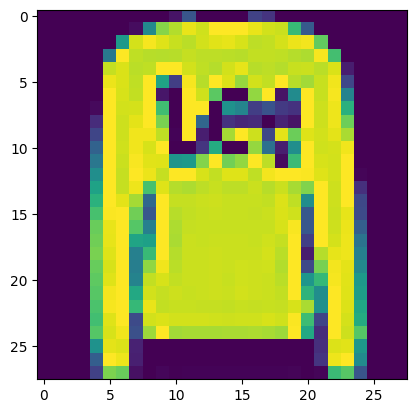

In [ ]:
plt.imshow(test_images[1])

# Probando una imagen ajena al dataset

In [ ]:
url= 'https://m.media-amazon.com/images/I/51yHdB1C5RL._AC_SL1000_.jpg'
img=Image.open(urllib.request.urlopen(url))

<function matplotlib.pyplot.show(close=None, block=None)>

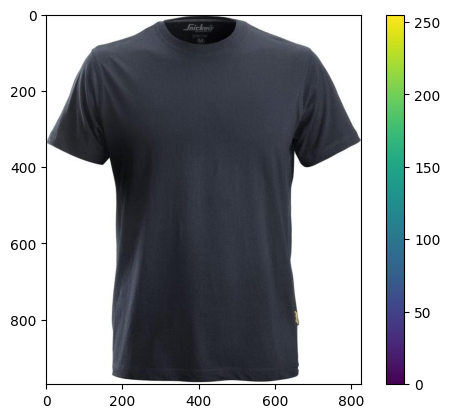

In [ ]:
imagen_prueba=np.array(img)
plt.figure()
plt.imshow(imagen_prueba)
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
imagen_prueba.shape

(970, 827, 3)

In [ ]:
imagen_de_prueba=255-imagen_prueba

<function matplotlib.pyplot.show(close=None, block=None)>

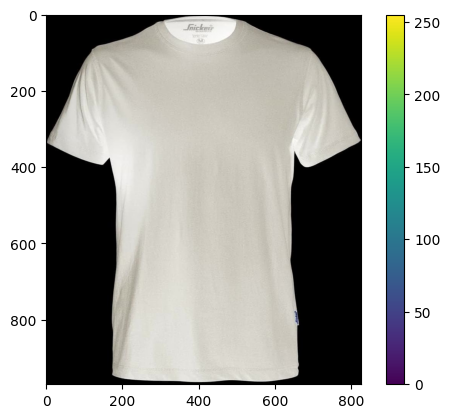

In [ ]:
plt.figure()
plt.imshow(imagen_de_prueba)
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
imagen_de_prueba.shape

(970, 827, 3)

In [ ]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3],[0.333,0.333,0.333])

In [ ]:
imagen_de_prueba_gray=rgb2gray(imagen_de_prueba)

<function matplotlib.pyplot.show(close=None, block=None)>

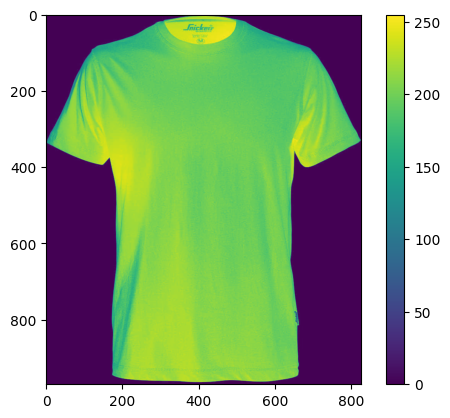

In [ ]:
plt.figure()
plt.imshow(imagen_de_prueba_gray)
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
imagen_de_prueba_gray.shape

(970, 827)

In [ ]:
rescalar=cv2.resize(imagen_de_prueba_gray, dsize=(28,28), interpolation=cv2.INTER_CUBIC)

<function matplotlib.pyplot.show(close=None, block=None)>

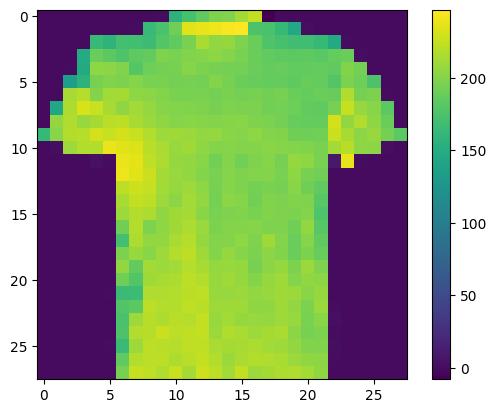

In [ ]:
plt.figure()
plt.imshow(rescalar)
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
rescalar2=rescalar/255

<function matplotlib.pyplot.show(close=None, block=None)>

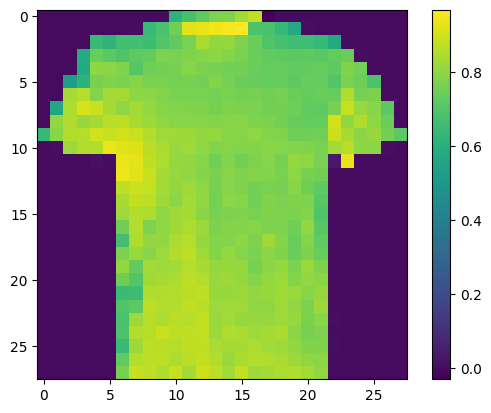

In [ ]:
plt.figure()
plt.imshow(rescalar2)
plt.colorbar()
plt.grid(False)
plt.show

In [ ]:
x=np.zeros((1,28,28))

In [ ]:
x.shape

(1, 28, 28)

In [ ]:
x[0]=np.array(rescalar2)

In [ ]:
predicciones=modelo.predict(x)
predicciones

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[9.9345666e-01, 1.7582685e-11, 1.9356550e-05, 3.0090376e-07,
        9.0069546e-10, 8.9041418e-14, 6.5233610e-03, 6.0228832e-24,
        2.0518756e-07, 2.2210888e-21]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

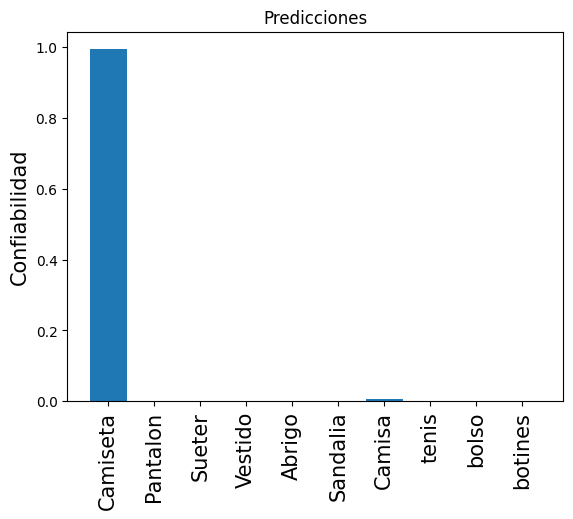

In [ ]:
index=np.arange(len(class_names))
plt.bar(index, predicciones[0])
plt.ylabel('Confiabilidad',fontsize=15)
plt.xticks(index,class_names, fontsize=15,rotation=90)
plt.title('Predicciones')
plt.show

# Probando un nuevo modelo con los pesos guardados

In [ ]:
modelo2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Capa de entrada plana
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

modelo2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
loss, acc=modelo2.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1252 - loss: 2.3045


In [ ]:
acc

0.11900000274181366

In [ ]:
modelo2.load_weights(checkpoint_path)
loss,acc=modelo2.evaluate(test_images,test_labels)
acc

 31/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8736 - loss: 0.3742 

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8586 - loss: 0.4121


0.8557999730110168

In [ ]:
!pip install --upgrade tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
